In [1]:
! pip install nltk
! pip install textblob
! pip install Sastrawi

In [2]:
import nltk
import textblob
import Sastrawi

# Nomor 1 :Melakukan seluruh percobaan pada modul dan memberikan analisis yang ditemukan


In [3]:
text = "In Brazil they drive on the right-hand side of the road. has a large coastline on the eastern side of South America"

from nltk.tokenize import word_tokenize
nltk.download('punkt')  
token = word_tokenize(text)
token

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Theresa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

In [4]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'the': 3, 'on': 2, 'side': 2, 'of': 2, 'In': 1, 'Brazil': 1, 'they': 1, 'drive': 1, 'right-hand': 1, 'road': 1, ...})

In [5]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist1 = fdist.most_common(10)
fdist1

[('the', 3),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('Brazil', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

In [6]:
! pip install pandas

import pandas as pd

<Axes: xlabel='Key'>

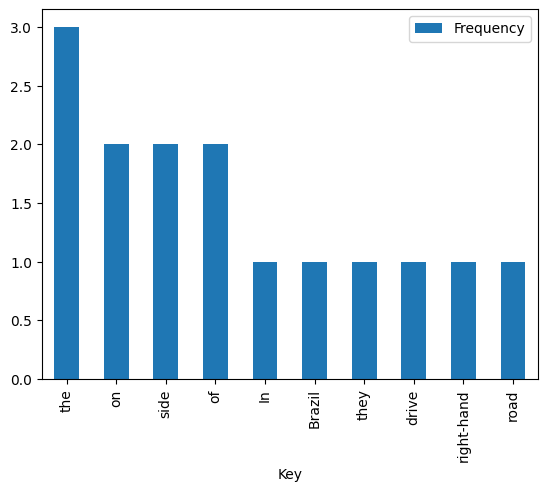

In [7]:
# convert ke dictionary
df_freq_token = pd.DataFrame.from_dict(dict(fdist1),orient='index')
df_freq_token.columns = ['Frequency']
df_freq_token.index.name = 'Key'

df_freq_token.plot(kind='bar')


STOP WORDS

In [8]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Theresa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
text = "Christiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal"
tokens = word_tokenize(text.lower())
filtered_tokens = [word for word in tokens if word not in stop_words]
print(filtered_tokens)


['christiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal']


In [10]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

S = 'presumably I would like to MultiPly my provision, saying that without crYing'
print('Sentence:', S)

stemmer_list = [LancasterStemmer, PorterStemmer, SnowballStemmer]
names = ['Lancaster', 'Porter', 'SnowBall']
for stemmer_name, stem in zip(names, stemmer_list):
    if stemmer_name == 'SnowBall':
        st = stem('english')
    else:
        st = stem()
    stemmed_words = [st.stem(word) for word in S.split()]
    print(stemmer_name, ':', ' '.join(stemmed_words))
    #konsisten menggunakan query yang mana

Sentence: presumably I would like to MultiPly my provision, saying that without crYing
Lancaster : presum i would lik to multiply my provision, say that without cry
Porter : presum i would like to multipli my provision, say that without cri
SnowBall : presum i would like to multipli my provision, say that without cri


In [11]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora:",lemmatizer.lemmatize("corpora"))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Theresa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


rocks : rock
corpora: corpus


In [12]:
#Contoh POS tags dengan NLTK (bahasa Inggris)
#post tag mengaktegorikan dia jenis katanya apa 

nltk.download("averaged_perceptron_tagger")
from nltk import pos_tag
S = 'I am currently learning NLP in English, but if possible I want to know NLP in Indonesian Language too'

tokens = word_tokenize(S)
print(pos_tag(tokens))
#tidak lagi hanya 9 macam tags seperti yang dibahas ahli bahasa

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Theresa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('I', 'PRP'), ('am', 'VBP'), ('currently', 'RB'), ('learning', 'VBG'), ('NLP', 'NNP'), ('in', 'IN'), ('English', 'NNP'), (',', ','), ('but', 'CC'), ('if', 'IN'), ('possible', 'JJ'), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('know', 'VB'), ('NLP', 'NNP'), ('in', 'IN'), ('Indonesian', 'JJ'), ('Language', 'NNP'), ('too', 'RB')]


In [13]:
from textblob import TextBlob

T = "Hello, Mr. Man. He smiled- This, i.e. that, is it."
sentence_tokens = TextBlob(T).sentences

#tokenisasi
print(TextBlob(T).words)

#tokenisasi kalimat
print([str(sent) for sent in sentence_tokens])

['Hello', 'Mr', 'Man', 'He', 'smiled', 'This', 'i.e', 'that', 'is', 'it']
['Hello, Mr. Man.', 'He smiled- This, i.e.', 'that, is it.']


In [14]:
#Contoh TextBlob Stemming &Lemmatizer 
from textblob import Word 

#Stemming 
print("Stem: ", Word('running').stem())

#Lemmatizer 
print("Lemmatize: ", Word('went').lemmatize('v'))

#default noun, plural akan menjadi singular dari akar katanya
#juga case sensitive


Stem:  run
Lemmatize:  go


In [15]:
#contoh POS tag dengan TextBlob pada bahasa inggris 
for word, pos in TextBlob(T).tags:
    print(word, pos, end=',')

Hello NNP,Mr. NNP,Man NNP,He PRP,smiled- MD,This DT,i.e NN,that DT,is VBZ,it PRP,

In [16]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize 
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
kalimat = "Andi kerap melakukan transasksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis"
stop = stopword.remove(kalimat.lower())
print(stop)

andi kerap melakukan transasksi rutin daring online. andi belanja online lebih praktis


In [137]:
#Lemmatizer dengan Sasrawi 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

I = "perayaan itu berbarengan dengan saat kita bepergian ke Makassar"
print(stemmer.stem(I))
print(stemmer.stem('Perayaan Bepergian Menyuarakan'))

raya itu bareng dengan saat kita pergi ke makassar
raya pergi suara


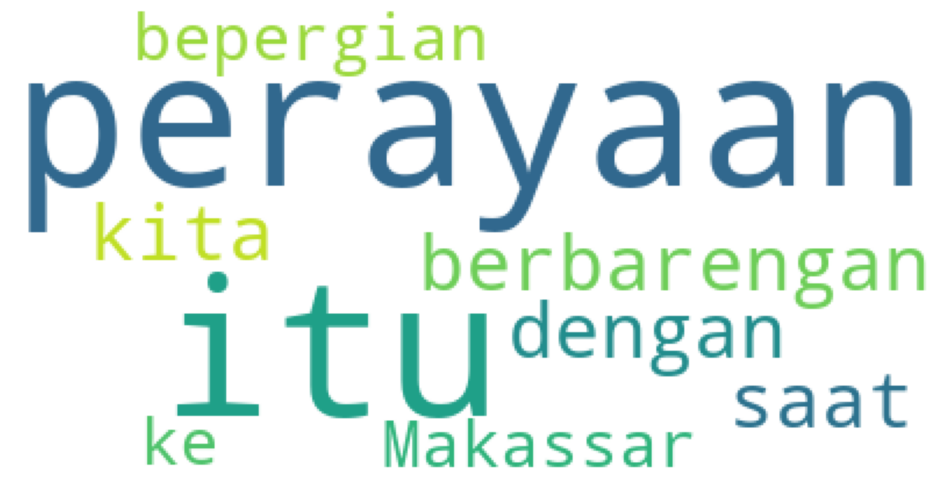

In [138]:
! pip install wordcloud

from matplotlib import pyplot as plt
from wordcloud import WordCloud 

wordcloud = WordCloud(background_color="white").generate(I)

#plot the wordcloud
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

#to remove the axis value
plt.axis("off")
plt.show()

In [142]:
import pickle
import os
import re
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# Mengambil daftar kata-kata berhenti (stopwords) dalam bahasa Inggris
stop_words = set(stopwords.words('english'))

# Path ke file data pickle
src_path = "C:/Thesa/UNAIR/SEM 5/datmin 2/praktikum/prak2/20newsgroup.pckl"

# Membaca data dari file pickle
with open(src_path, 'rb') as fin:
    data = pickle.load(fin)

# Mengambil dokumen dan label dari data
docs = data.data
labels = data.target

# Fungsi untuk melakukan preprocessing pada dokumen
def preprocess(doc):
    # Membagi dokumen menjadi kalimat-kalimat
    sents = sent_tokenize(doc)
    sents_tok = []  # Daftar untuk menyimpan token-token kalimat
    
    for s in sents:
        # Tokenisasi kata dalam kalimat
        words = word_tokenize(s)
        
        # Filter kata-kata dengan kondisi tertentu (huruf alfanumerik dan bukan stopwords)
        words = [w.lower() for w in words if w.isalnum() and w.lower() not in stop_words]
        
        # Menambahkan token-token kata ke dalam daftar token kalimat
        sents_tok.extend(words)
    
    # Menggabungkan token-token kalimat menjadi satu string
    return " ".join(sents_tok)

# Melakukan preprocessing pada semua dokumen
docs_clear = [preprocess(doc) for doc in docs]

# Simpan output ke dalam file teks
output_path = "output.txt"
with open(output_path, 'w', encoding='utf-8') as fout:
    fout.write("\n".join(docs_clear))

# Menampilkan pesan bahwa proses telah selesai
print('DONE! Output telah disimpan dalam file:', output_path)

DONE! Output telah disimpan dalam file: output.txt


In [143]:
# Representasi Vektor dengan VSM-TFIDF

# Import modul-modul yang dibutuhkan
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

# Inisialisasi objek TfidfVectorizer dengan parameter tertentu
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)

# Transformasi teks menjadi matriks TF-IDF
X = tfidf_vectorizer.fit_transform(docs_clear)

# Mencetak bentuk (shape) dari matriks TF-IDF
print(X.shape)

# Jumlah cluster yang diinginkan
k = 3

# Inisialisasi model K-Means dengan parameter tertentu
seed = 99
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, random_state=seed)

# Melatih model K-Means pada matriks TF-IDF
km.fit(X)

# Prediksi hasil clustering untuk setiap data dalam matriks
C_km = km.predict(X)

# Mencetak hasil clustering untuk 10 data pertama
print(C_km[:10])


(1653, 9916)


c:\Users\Theresa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[2 0 2 0 0 0 0 2 0 0]


In [22]:
#DBSCAN 
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

import numpy as np

dbscan = cluster.DBSCAN(eps=0.5)
dbscan.fit(X)
C_db = dbscan.labels_.astype(int)
C_db[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [23]:
from sklearn.metrics import silhouette_score as siluet 
C_kmpp = kmPP.labels_
C = [C_km, C_kmpp, C_db]
for res in C:
    print(siluet(X,res), end=', ')

0.016440240467356152, 0.016304429240978406, -0.2376775593818499, 

In [24]:
from sklearn.metrics.cluster import homogeneity_score as purity

for res in C:
    print(purity(labels,res), end=', ')

0.20503501662638796, 0.2349037057386137, 0.0015549989772357536, 

## Nomor 2: Jelaskan perbedaan hasil dari Preprocessing menggunakan NLTK dan TextBlob serta berikan contohnya.

In [25]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

teks = "Halo nama saya Thesa."

# Tokenisasi
tokens = word_tokenize(teks)

# Penghapusan tanda baca
clean_tokens = [word for word in tokens if word.isalnum()]

# Penghapusan kata-kata berhenti
stop_words = set(stopwords.words("indonesian"))
filtered_tokens = [word for word in clean_tokens if word.lower() not in stop_words]

# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

print(stemmed_tokens)


['halo', 'nama', 'thesa']


In [26]:
from textblob import TextBlob

text = "Halo nama saya Thesa"

# Tokenisasi
blob = TextBlob(text)
tokens = blob.words

print(tokens)

['Halo', 'nama', 'saya', 'Thesa']


In [121]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

text = "Halo nama saya Thesa"

# Tokenisasi
words = text.split()

# Penghapusan tanda baca dan stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

cleaned_words = []
for word in words:
    cleaned_word = stemmer.stem(word)
    cleaned_words.append(cleaned_word)

print(cleaned_words)


['halo', 'nama', 'saya', 'thesa']


## Nomor 3: Crawling dataset dengan total 10 pada berbagai portal berita Nasional dengan kategori bebas namun wajib sama.

In [92]:
import pandas as pd
import csv

teks_gempa = []
with open('Gempa.csv', 'r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        teks_gempa.append(row)
df = pd.DataFrame(teks_gempa, columns=["Judul", "Teks"])
df.drop_duplicates(inplace=True)
print(df)


                                               Judul  \
0  ﻿Hari Ini Dua Gempa Guncang Kepulauan Talaud S...   
1  Gempa Magnitudo 6,1 Guncang Kepulauan Talaud, ...   
2  Gempa Terkini Magnitudo 6,3 Guncang Kepulauan ...   
3  BMKG Bocorkan Penyebab Gempa M 6,3 di Kepulaua...   
4  Gempa Bumi M 6,3 Guncang Talaud Sulut, Tak Ber...   
5  Gempa M 6,3 Guncang Kepulauan Talaud Pagi Ini ...   
6  Gempa-Bumi di KEPULAUAN-TALAUD, SULAWESI-UTARA...   
7  Gempa M 6,3 di Talaud Akibat Subduksi Lempeng ...   
8  Kepulauan Talaud, Sulut Diguncang Gempa M 6,3,...   
9  Gempa berkekuatan magnitudo 7,1 guncang Talaud...   

                                                Teks  
0  BANDUNG - Kepulauan Talaud, Sulawesi Utara har...  
1  Jakarta, CNN Indonesia -- Gempa bumi berkekuat...  
2  Gempa Magnitudo 6,3 mengguncang wilayah Pulau ...  
3  Badan Meteorologi, Klimatologi, dan Geofisika ...  
4  Gempa tektonik magnitudo 6,3 mengguncang wilay...  
5  Hasil analisis BMKG, mekanisme sumber menunjuk... 

## Nomor 4: Lakukan preprocessing yang sudah diajarkan pada modul ini (menggunakan salah satu library saja). 

In [93]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stem_text_in_dataframe(input_df, input_column, output_column):
    df = input_df.copy()
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    df[output_column] = df[input_column].apply(lambda x: stemmer.stem(x))
    return df


In [94]:
gempa2 = stem_text_in_dataframe(df, 'Teks', 'Teks_Stemmed')
file_output = "Gempa with Stemmed Text.csv"
gempa2.to_csv(file_output, index=False, encoding='utf-8')

## Nomor 5: Buatlah wordcloud dan most common word barplot, interpretasikan hasilnya 

In [95]:
gempa2
Teks_Stemmed = gempa2[['Teks_Stemmed']]
Teks_Stemmed

,Teks_Stemmed
0,bandung - pulau talaud sulawesi utara hari ini...
1,jakarta cnn indonesia -- gempa bumi kuat magni...
2,gempa magnitudo 6 3 guncang wilayah pulau kara...
3,badan meteorologi klimatologi dan geofisika bm...
4,gempa tektonik magnitudo 6 3 guncang wilayah p...
5,hasil analisis bmkg mekanisme sumber tunjuk ba...
6,informasi awal pusat krisis sehat hadap bencan...
7,gempa bumi magnitudo m 6 3 jadi di pulau karat...
8,kembali jadi gempa dengan magnitudo 6 3 yang j...
9,gempa kuat magnitudo 7 1 yang pusat di laut fi...


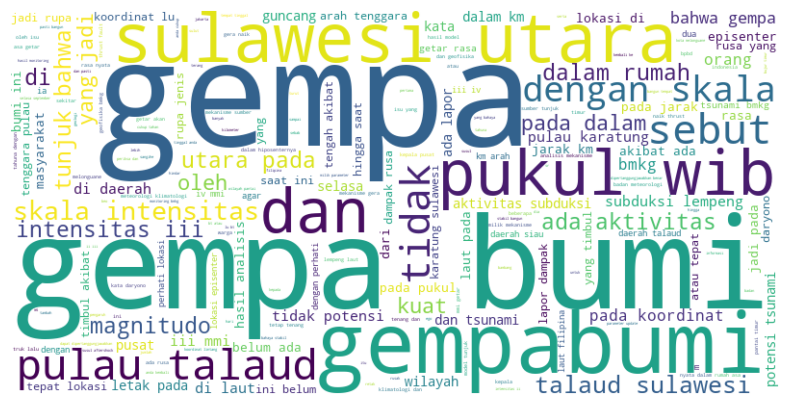

In [104]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membuat fungsi untuk memeriksa dan mengonversi elemen ke string jika diperlukan
def ensure_string(element):
    if isinstance(element, list):
        return ' '.join(map(str, element))
    elif isinstance(element, str):
        return element
    else:
        return str(element)

# Memastikan semua elemen dalam list adalah string
Teks_Stemmed_list = [ensure_string(item) for item in Teks_Stemmed_list]

# Menggabungkan teks yang telah di-stem menjadi satu string
text_combined = ' '.join(Teks_Stemmed_list)

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Theresa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


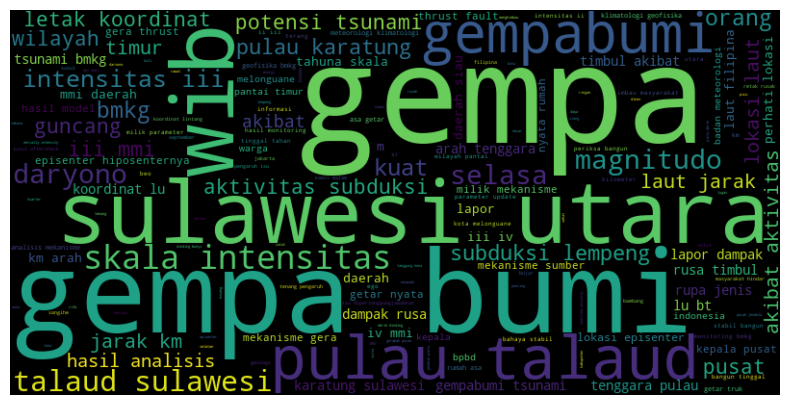

In [101]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(text):
    words = text.split()
    cleaned_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(cleaned_words)

Teks_Stemmed_cleaned = [remove_stopwords(text) for text in Teks_Stemmed_list]

text_combined = ' '.join(Teks_Stemmed_cleaned)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

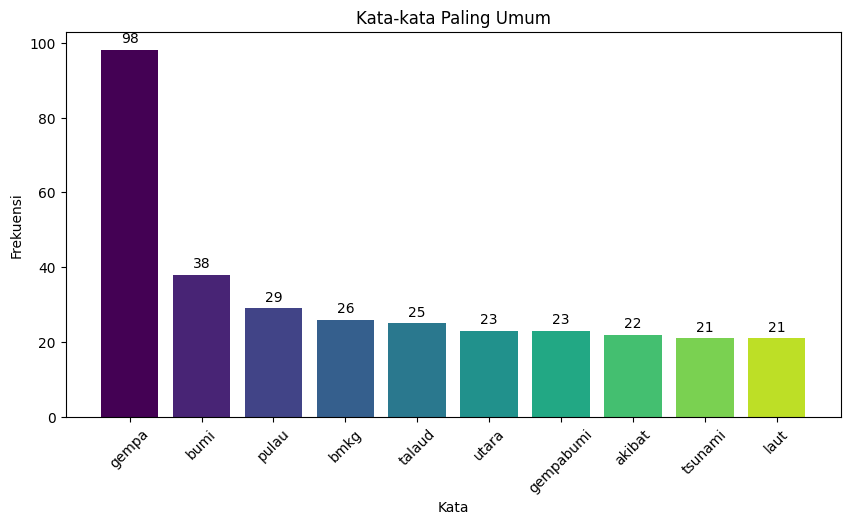

In [134]:
import numpy as np  # Import numpy untuk menghasilkan warna acak

# Menggabungkan list teks yang telah di-stem menjadi satu string
combined_text = ' '.join(Teks_Stemmed_cleaned)

# Menghitung frekuensi kemunculan kata-kata
kata_kemunculan = Counter(combined_text.split())

# Ambil 10 kata paling umum
kata_umum = kata_kemunculan.most_common(10)

# Pisahkan kata dan frekuensinya
kata, frekuensi = zip(*kata_umum)

# Membuat daftar warna acak untuk setiap batang
colors = [plt.cm.viridis(i / len(kata)) for i in range(len(kata))]

# Buat barplot dengan warna acak
plt.figure(figsize=(10, 5))
bars = plt.bar(kata, frekuensi, color=colors)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata-kata Paling Umum')
plt.xticks(rotation=45)

# Tambahkan label pada tiap batang
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 poin di atas titik tinggi batang
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()


## Nomor 6 : Lakukan clustering dengan menggunakan fitur TF-IDF

In [153]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Mengambil data dari file CSV
file_path = "Gempa with Stemmed Text.csv"  
dataset = pd.read_csv(file_path, encoding='utf-8')

# Inisialisasi objek TfidfVectorizer dengan parameter tertentu
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)

# Menghitung representasi TF-IDF dari teks
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['Teks_Stemmed'])

# Menentukan jumlah cluster (k) dan seed
k = 3  
seed = 99  

# Inisialisasi model K-Means dengan parameter tertentu
km = KMeans(n_clusters=k, init='random', max_iter=300, random_state=seed, n_init=10)

# Melakukan clustering pada data TF-IDF
km.fit(tfidf_matrix)

# Mendapatkan hasil clustering
labels = km.labels_

# Menambahkan kolom 'Number Cluster' ke data
dataset['Number Cluster'] = labels

# Menyimpan data hasil clustering ke dalam file CSV
output_file_path = "Gempa with Clustering.csv"  
dataset.to_csv(output_file_path, index=False, encoding='utf-8')

## Nomor 7 : Buat visualisasi clusternya dan lakukan interpretasi terhadap hasil tersebut

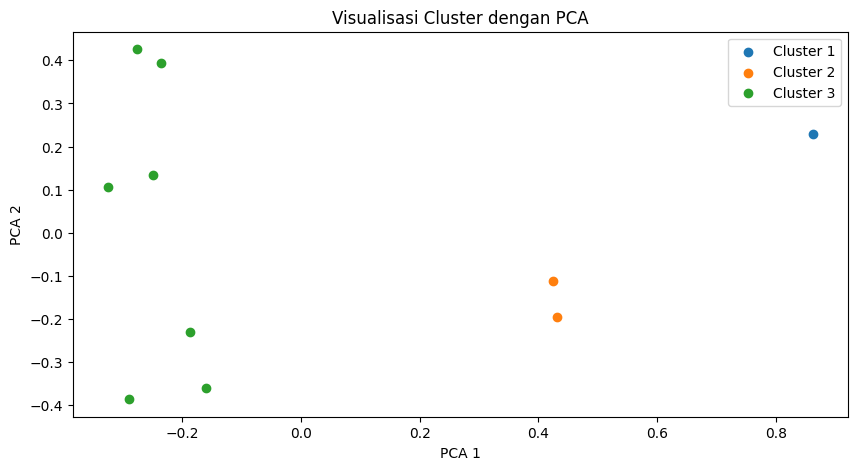

In [124]:
import pandas as pd
import pickle 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # Import modul PCA

# Mengambil data dari file CSV
file_path = "Gempa with Stemmed Text.csv"  
data = pd.read_csv(file_path, encoding='utf-8')

# Mengimpor modul untuk ekstraksi fitur TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi objek TfidfVectorizer dengan parameter tertentu
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)

# Menghitung representasi TF-IDF dari teks
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Teks_Stemmed'])

# Mengimpor modul K-Means dari scikit-learn
from sklearn.cluster import KMeans

# Menentukan jumlah cluster (k) dan seed
k = 3
seed = 99  

# Inisialisasi model K-Means dengan parameter tertentu
km = KMeans(n_clusters=k, init='random', max_iter=300, random_state=seed, n_init=10)

# Melakukan clustering pada data TF-IDF
km.fit(tfidf_matrix)

# Mendapatkan hasil clustering
labels = km.labels_

# Menambahkan kolom 'cluster' ke data
data['cluster'] = labels

# Menggunakan PCA untuk mereduksi dimensi menjadi 2 dimensi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Menambahkan kolom 'x' dan 'y' ke data
data['x'] = pca_result[:, 0]
data['y'] = pca_result[:, 1]

# Visualisasi cluster dengan scatter plot
plt.figure(figsize=(10, 5))
for cluster in range(k):
    plt.scatter(data[data['cluster'] == cluster]['x'], data[data['cluster'] == cluster]['y'], label=f'Cluster {cluster + 1}')

plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

## Nomor 8 : Gunakan validasi menggunakan salah satu Davies-Bouldin index atau Silhouette score

In [126]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

file_path = "Gempa with Stemmed Text.csv"  
data = pd.read_csv(file_path, encoding='utf-8')

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)

tfidf_matrix = tfidf_vectorizer.fit_transform(data['Teks_Stemmed'])

best_silhouette_score = 1 

for k in range(2, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=99, n_init=10)
    km.fit(tfidf_matrix)
    labels = km.labels_
    silhouette_avg = silhouette_score(tfidf_matrix, labels)
    print(f"Silhouette Score for k={k}: {silhouette_avg}")

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_k = k
        best_labels = labels

print(f"Best Silhouette Score: {best_silhouette_score} for k={best_k}")

data['cluster'] = best_labels

Silhouette Score for k=2: 0.20995267525664435
Silhouette Score for k=3: 0.12810065883415614
Silhouette Score for k=4: 0.12086716593637628
Silhouette Score for k=5: 0.11547165314167865
Silhouette Score for k=6: 0.11348262180418663
Silhouette Score for k=7: 0.11065075419557877
Silhouette Score for k=8: 0.06941693044314162
Silhouette Score for k=9: 0.03111629868418516
Best Silhouette Score: 1 for k=2


In [154]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Membaca data dari file CSV
file_path = "Gempa with Stemmed Text.csv"  
data = pd.read_csv(file_path, encoding='utf-8')

# Inisialisasi objek TfidfVectorizer dengan parameter tertentu
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Teks_Stemmed'])

# Range nilai k yang akan diuji
k_values = range(2, 11)  

# Iterasi untuk mencari nilai Davies-Bouldin Index untuk setiap k
for k in k_values:
    if k < len(data):  
        km = KMeans(n_clusters=k, init='random', max_iter=300, random_state=99, n_init=10)
        km.fit(tfidf_matrix)
        labels = km.labels_
        dbi = davies_bouldin_score(tfidf_matrix.toarray(), labels)
        print(f"For k={k}, Davies-Bouldin Index: {dbi}")

For k=2, Davies-Bouldin Index: 1.4748887501721355
For k=3, Davies-Bouldin Index: 1.0922275306892983
For k=4, Davies-Bouldin Index: 1.1271029365431158
For k=5, Davies-Bouldin Index: 1.0181634036252318
For k=6, Davies-Bouldin Index: 0.6738855996512627
For k=7, Davies-Bouldin Index: 0.7257096542120894
For k=8, Davies-Bouldin Index: 0.5506845340977564
For k=9, Davies-Bouldin Index: 0.34474678720001123
